# Food Deserts in Pittsburgh 🥗🌵
<img src="https://pittnews.com/wp-content/uploads/2015/10/fooddesert-AS-web.jpg" alt="Illustration from Pitt News" width="400">

When I first moved to Oakland for school, one of the first questions I asked my roommates was where the closest grocery store was; their hesitation in answering made it clear I would be counting the days until my lease was over. In my academic transience, the lack of access to fresh food is an inconvenience. For those living in Pittsburgh permanently, it is a crisis. In this project, I mapped out the locations of fast food restaurants and supermarkets within Pittsburgh to identify food deserts, and attempted to find a correlation between these locations and the economic standing of neighborhoods. 

## 📊 Data
I chose a number of datasets from the [Western Pennsylvania Regional Data Center.](http://www.wprdc.org/) These datasets included:
- [Neighborhoods with SNAP Data.](https://data.wprdc.org/dataset/neighborhoods-with-snap-data) This dataset includes vast census data per neighborhood as well as the geographic information needed for visualization.
- [Allegheny County Supermarkets & Convenience Stores.](https://data.wprdc.org/dataset/allegheny-county-supermarkets-convenience-stores) This dataset shows locations of supermarkets and convenient stores across all of Allegheny County.
- [Allegheny County Fast Food Establishments.](https://data.wprdc.org/dataset/allegheny-county-fast-food) This dataset shows locations of fast food restaurants and includes other menu data, such as dollar menus.

## 🎯 Goals
The goals of this project are to clearly identify the food deserts that exist in Pittsburgh through visualization and to identify the underlying causes. By analyzing the socioeconomic causes and implications of food deserts, I hope to influence the ideas of lawmakers, urban planners and developers, nutritionists, and corporations to pay better attention to the placement of sources of fresh food. The issues that these visualizations highlight can bring about the change to eliminate these food deserts and bring better, healthier food to everyone in Pittsburgh.

An unintended consequence of these visualizations could be the discouragement of potential residents or developers from living or working in these areas. Highlighting incomes and food sources (or lack thereof) could be a major factor in the decisions people make interacting with these places.

## 📝 Process
At the offset of this project, I wanted to focus on something more lighthearted and in line with my interests, so focusing on food was a good choice. However, after researching the topic and looking at the data, I felt compelled by my love for food to highlight the issue of food deserts within our city.

My project went through a food iterations: I originally wanted to focus on obesity rates per neighborhood, but the obesity rate data collected by Allegheny County was too difficult to work with and achieve significant results. For this reason, I eschewed population health _results_ for systemic socioeconomic _causes_.

## 🦋 Transformations
Because my visualizations focus on choropleth and geopoint maps and my data is formatted in coordinate systems, not many transformations were performed to get the data to fit. The transformations I performed were:
- The SNAP neighborhood shapefile was converted to the WGS84 coordinate reference system (as used in GPS) to work with the latitude/longitude coordinates of the establishment data.
- Some entries in the establishment data were dropped due to null or incorrect coordinate data.
- The establishment data was limited to the approximate latitude and longitude values of Pittsburgh city limits.

## 🗺 Visualizations

Text(0.5, 1.0, 'Figure 1')

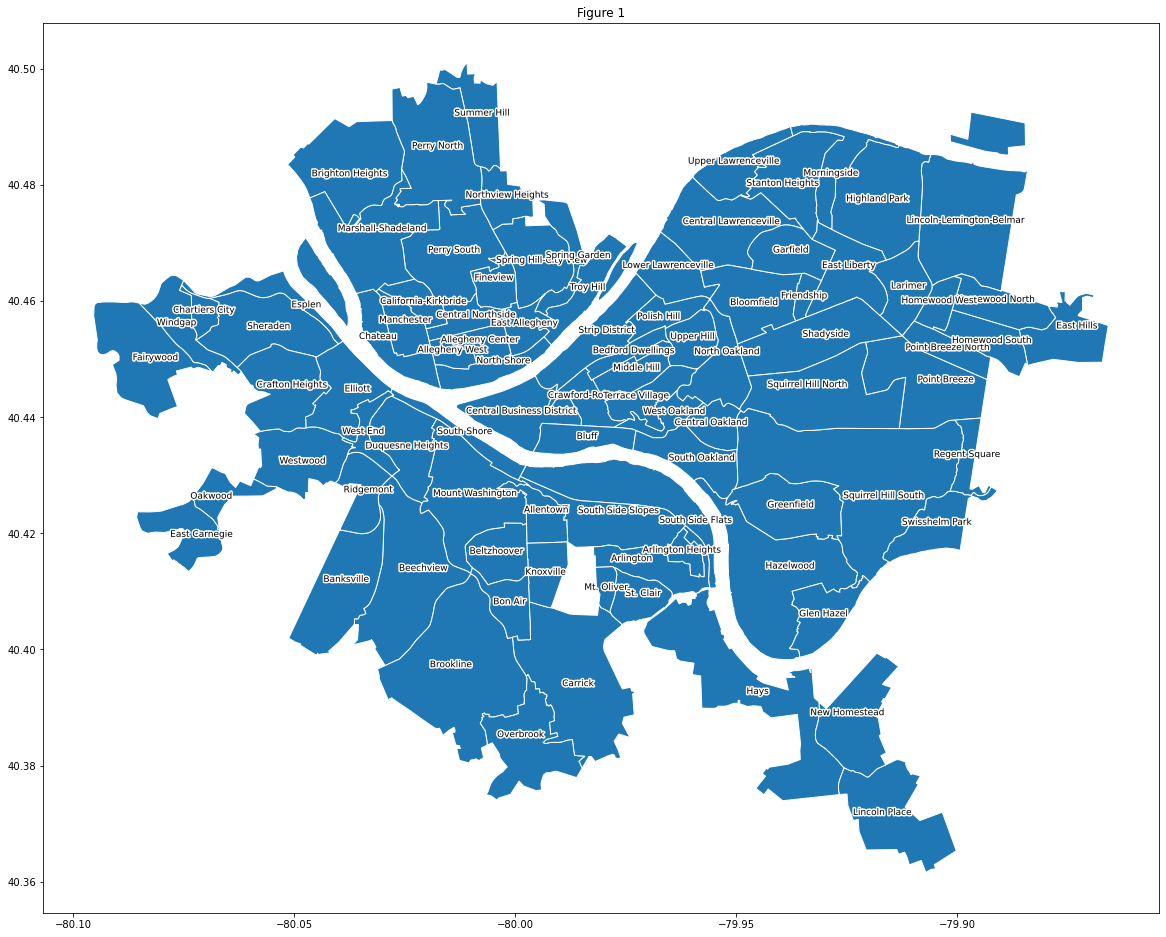

In [8]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patheffects as pe
from shapely.geometry import Point, Polygon

# import map data
pgh_map = gpd.read_file("SNAP/Neighborhood_SNAP.shp") # map shapefile and demographic data
stores = pd.read_csv('conv-sm.csv') # supermarkets/convenience stores
fast = pd.read_csv('fastfood.csv') # fast food restaurants

# define PGH city lat/lon limits
north =  40.5
south =  40.36
east  = -80.1
west  = -79.86

## clean up data 
# filter out null coord data
stores = stores[stores['Lat'].notna() | stores['Lon'].notna()]
fast = fast[fast['Lat'].notna() | fast['Lon'].notna()]
# limit to values within PGH city limits
stores.drop(stores[(stores['Lat'] >= north) | (stores['Lat'] < south)].index, inplace = True)
stores.drop(stores[(stores['Lon'] >= west) | (stores['Lon'] < east)].index, inplace = True)
fast.drop(fast[(fast['Lat'] >= north) | (fast['Lat'] < south)].index, inplace = True)
fast.drop(fast[(fast['Lon'] >= west) | (fast['Lon'] < east)].index, inplace = True)

# project map data to lat/lon
pgh_map['geometry'] = pgh_map['geometry'].to_crs(epsg=4326)

# search shapefile columns
#print(pgh_map.columns.tolist())
#print(pgh_map['Neighbor19'])

# more usable column names
pgh_map['hood_name'] = pgh_map['Neighbor19']
pgh_map['med_income'] = pgh_map['F2009_Med_']

# define map size and labels
fig,ax = plt.subplots(figsize = (20,20)) # plot size
#ax.margins(x=-0.25, y=-0.25) # whitespace
#ax.set_xlabel('Latitude') # x axis label on map
#ax.set_ylabel('Longitude') # y axis label on map

# coordinate system
crs = 'epsg:4326' # define coordinate system (WGS84)
geometry = [Point(xy) for xy in zip(stores['Lon'],stores['Lat'])] # supermarket + convenience coords
geometry2 = [Point(xy) for xy in zip(fast['Lon'],fast['Lat'])] # fast food coords
geo_df = gpd.GeoDataFrame(stores, crs = crs, geometry = geometry)
geo_df2 = gpd.GeoDataFrame(fast, crs = crs, geometry = geometry2)

# extract and append neighborhood labels
def label_map():
    pgh_map['coords'] = pgh_map['geometry'].apply(lambda x: x.representative_point().coords[:])
    pgh_map['coords'] = [coords[0] for coords in pgh_map['coords']]
    for idx, row in pgh_map.iterrows():
        plt.annotate(text = row['hood_name'], xy=row['coords'],
                     horizontalalignment='center', size=9, path_effects=[pe.withStroke(linewidth=3, foreground='white')])

# plot map
label_map() # neighborhood labels
pgh_map.plot(ax=ax, edgecolor='white') # map
plt.title('Figure 1') # title

### **Figure 1.** Map of Pittsburgh with all 90 neighborhoods labelled.

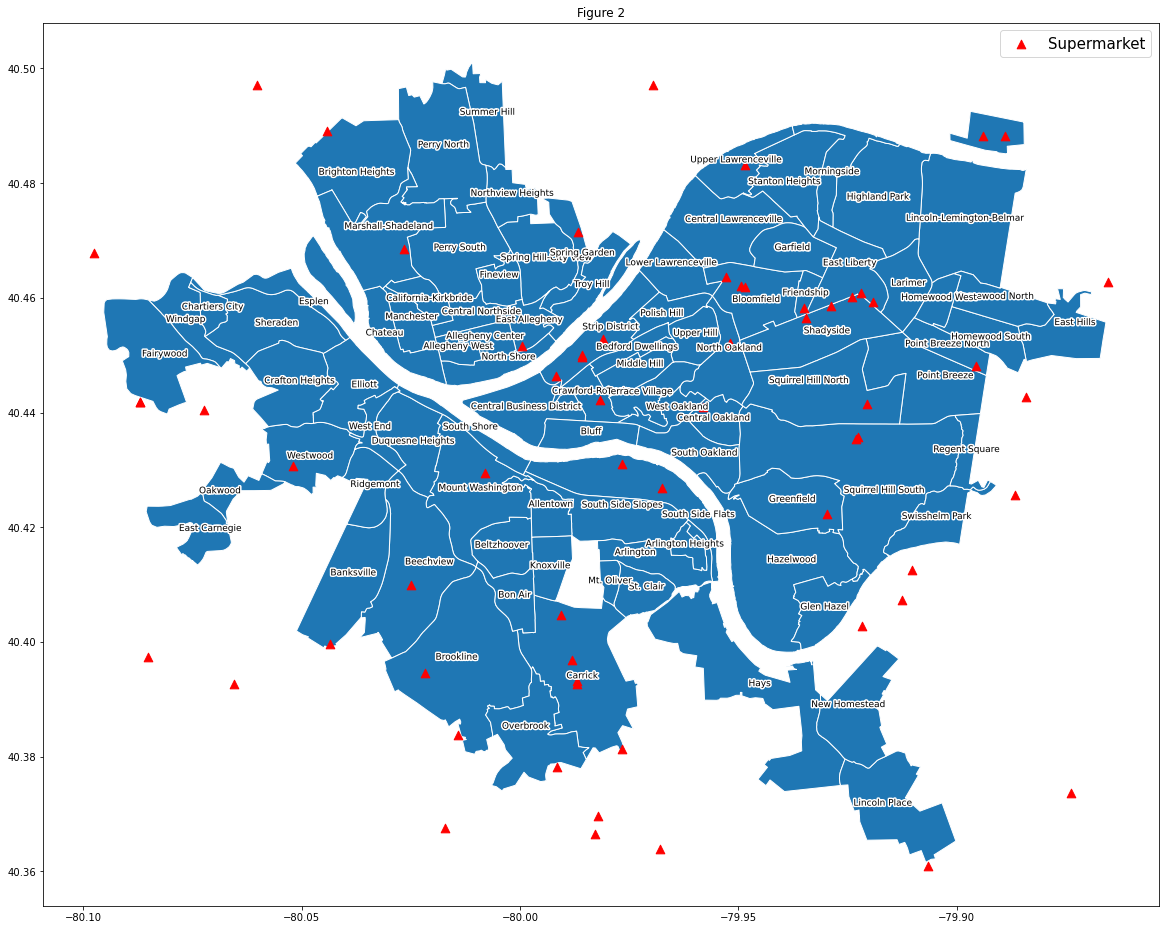

In [9]:
# plot map
fig,ax = plt.subplots(figsize = (20,20)) # map size
label_map() # add labels
pgh_map.plot(ax=ax, edgecolor='white') # plot map
plt.title('Figure 2') # title

# plot supermarkets
geo_df[geo_df['Category'] == 'Supermarket'].plot(ax = ax, markersize = 75, color = 'r', marker = '^', label = 'Supermarket') # pts
plt.legend(prop = {'size': 15}) # legend

### **Figure 2.** Map of Pittsburgh neighborhoods with supermarkets plotted.

There are gaps in neighborhoods where supermarkets could be. What is there instead?

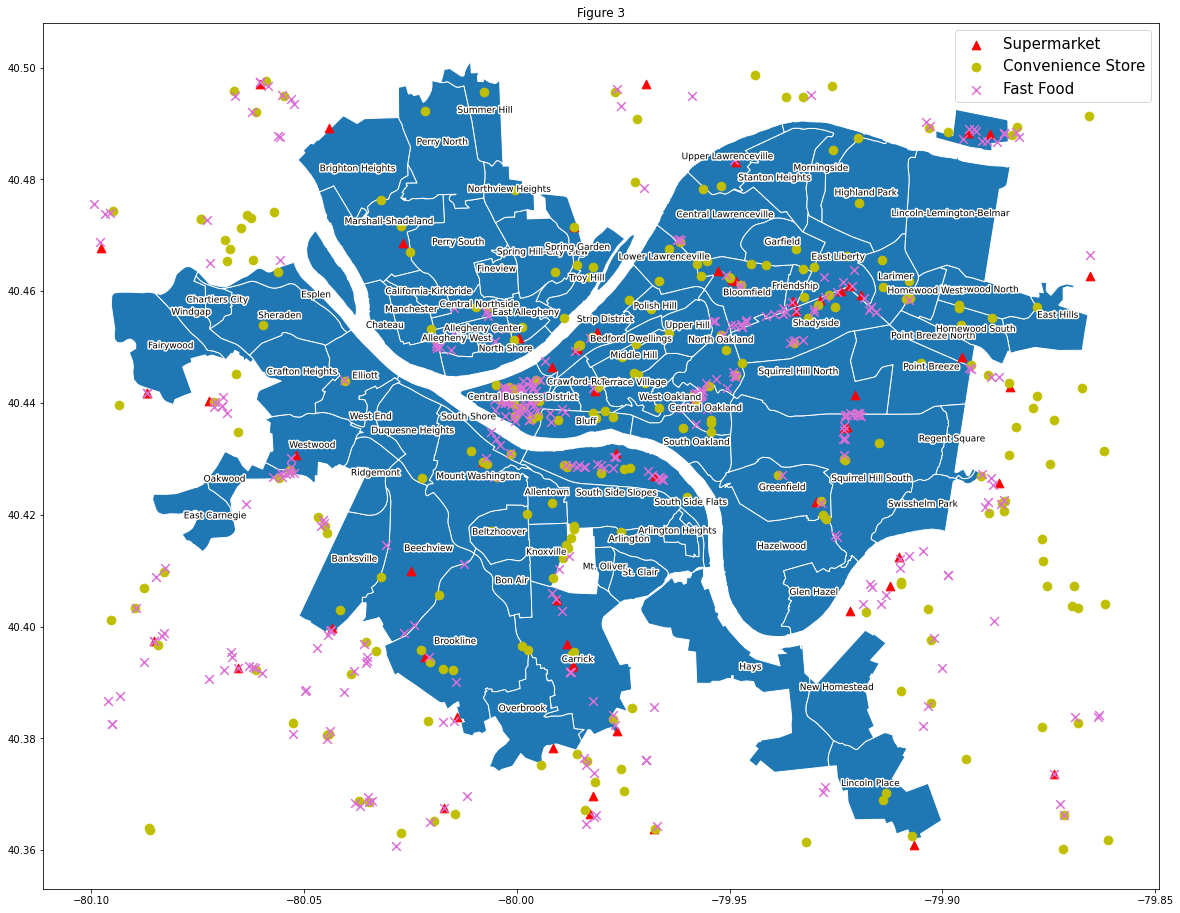

In [10]:
# plot map
fig,ax = plt.subplots(figsize = (20,20)) # map size
label_map() # add labels
pgh_map.plot(ax=ax, edgecolor='white') # plot map
plt.title('Figure 3') # title

# plot places
geo_df[geo_df['Category'] == 'Supermarket'].plot(ax = ax, markersize = 75, color = 'r', marker = '^', label = 'Supermarket') # pts
geo_df[geo_df['Category'] == 'Convenience Store'].plot(ax = ax, markersize = 75, color = 'y', marker = 'o', label = 'Convenience Store') # convenience stores
geo_df2.plot(ax = ax, markersize = 75, color = 'orchid', marker = 'x', label = 'Fast Food') # fast food restaurants
plt.legend(prop = {'size': 15}) # legend

### **Figure 3.** Map of Pittsburgh neighborhoods with supermarkets, convenience stores, and fast food restaurants plotted.

Convenience stores and fast food restaurants completely outnumber supermarkets. Areas with few or no supermarkets have an abundance of unhealthy choices.

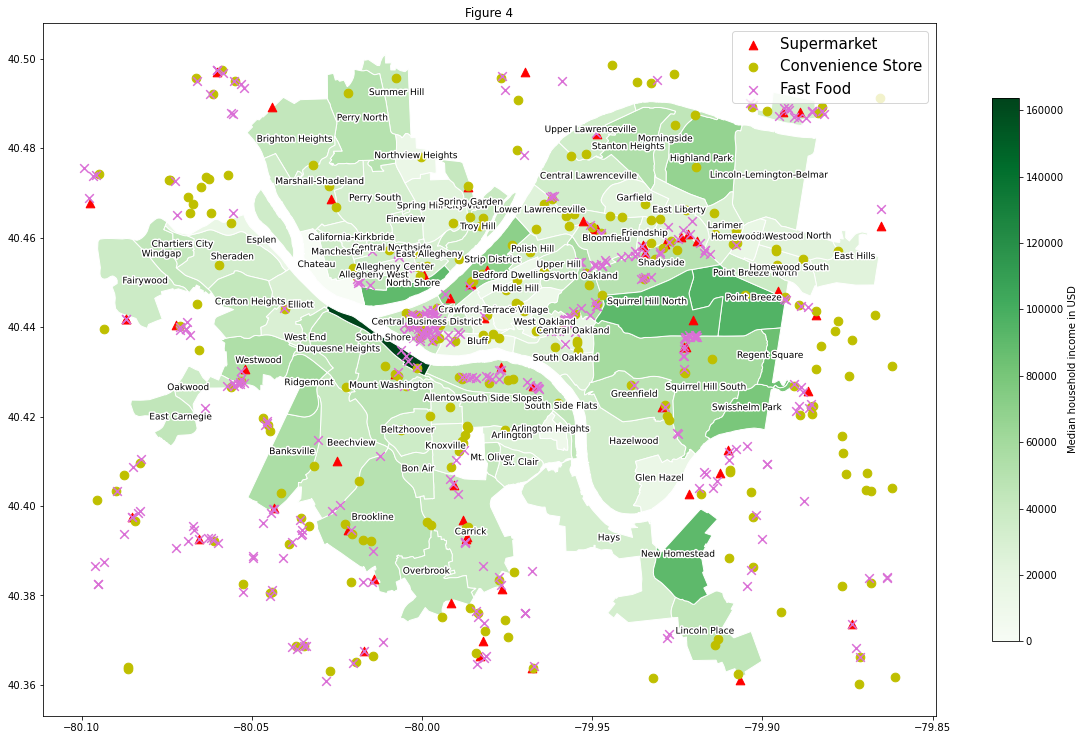

In [11]:
# plot map
fig,ax = plt.subplots(figsize = (20,20)) # map size
label_map() # add labels
pgh_map.plot(ax=ax, column='med_income', cmap='Greens', edgecolor='white', legend=True, legend_kwds={'label': "Median household income in USD", 'shrink': 0.5}) # plot map
plt.title('Figure 4') # title

# plot places
geo_df[geo_df['Category'] == 'Supermarket'].plot(ax = ax, markersize = 75, color = 'r', marker = '^', label = 'Supermarket') # pts
geo_df[geo_df['Category'] == 'Convenience Store'].plot(ax = ax, markersize = 75, color = 'y', marker = 'o', label = 'Convenience Store') # convenience stores
geo_df2.plot(ax = ax, markersize = 75, color = 'orchid', marker = 'x', label = 'Fast Food') # fast food restaurants
plt.legend(prop = {'size': 15}) # legend

### **Figure 4.** Map of Pittsburgh neighborhoods colored by median household income with supermarkets, convenience stores, and fast food restaurants plotted.

Supermarkets seem to be clustered in the comparatively wealthier neighborhoods. Let's take a closer look at the East End.

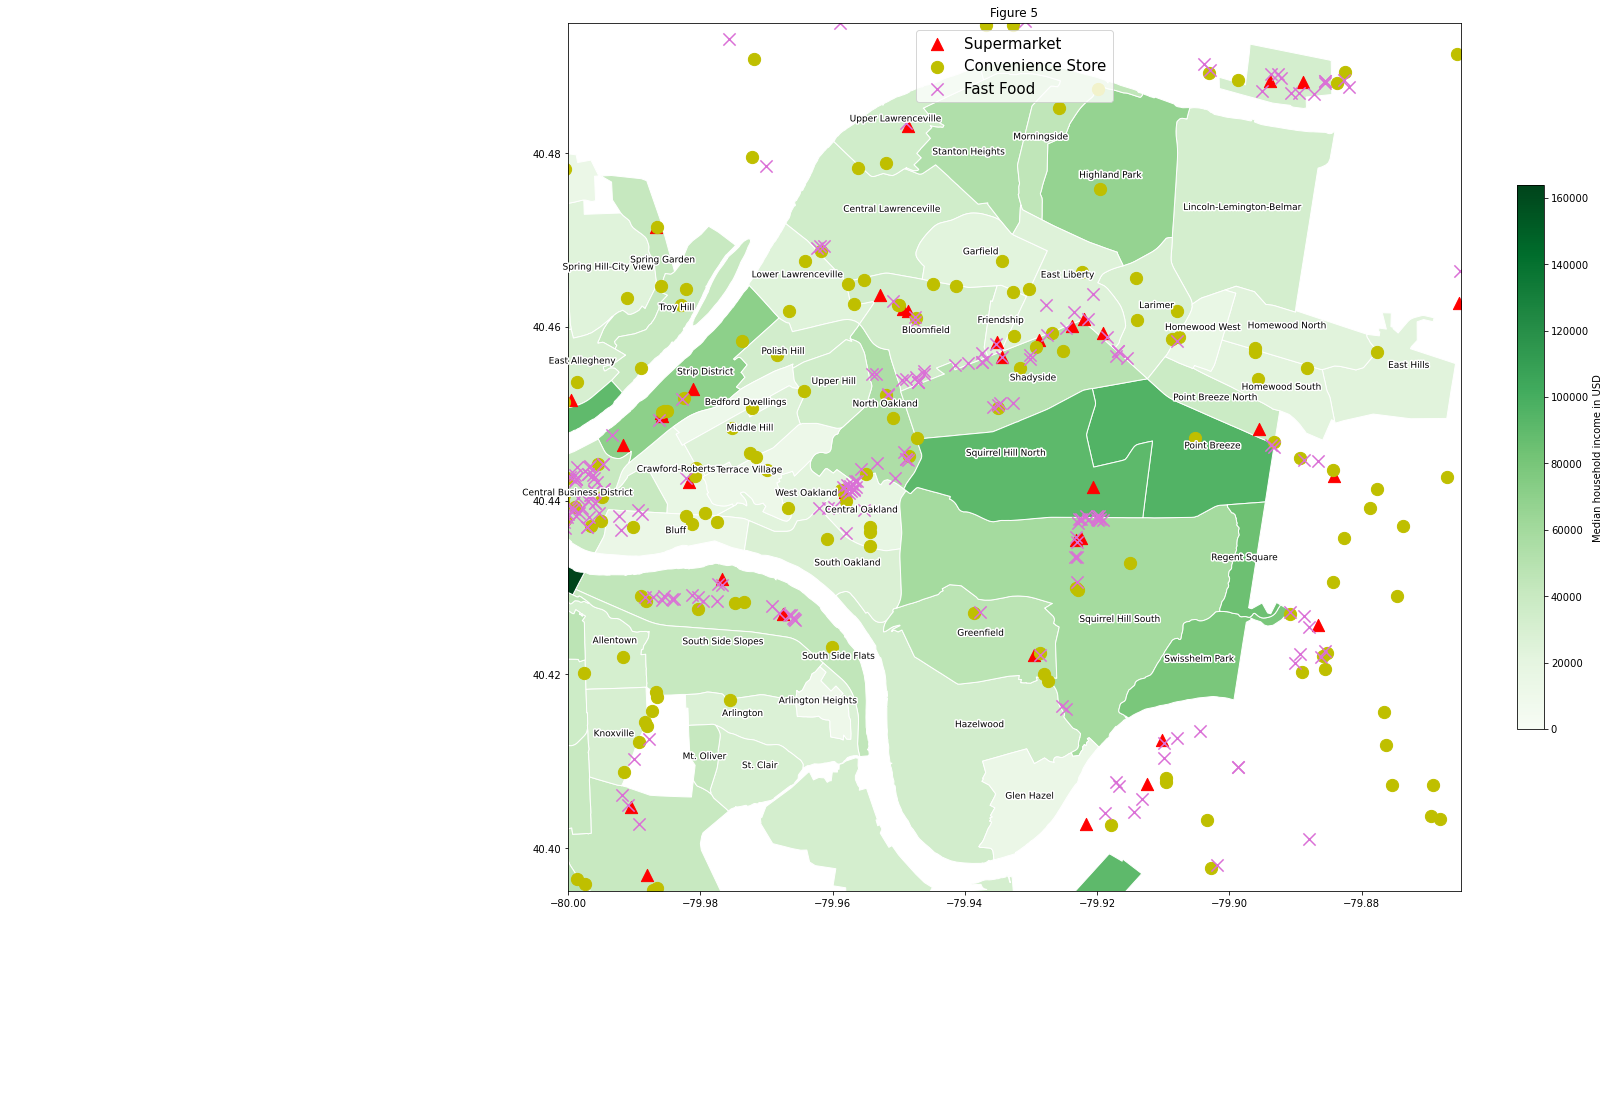

In [12]:
# plot map
fig,ax = plt.subplots(figsize = (20,20)) # map size
label_map() # add labels
pgh_map.plot(ax=ax, column='med_income', cmap='Greens', edgecolor='white', legend=True, legend_kwds={'label': "Median household income in USD", 'shrink': 0.5}) # plot map
plt.title('Figure 5') # title
plt.axis([-80, -79.865, 40.395, 40.495]) # focus on east end

# plot places
geo_df[geo_df['Category'] == 'Supermarket'].plot(ax = ax, markersize = 150, color = 'r', marker = '^', label = 'Supermarket') # pts
geo_df[geo_df['Category'] == 'Convenience Store'].plot(ax = ax, markersize = 150, color = 'y', marker = 'o', label = 'Convenience Store') # convenience stores
geo_df2.plot(ax = ax, markersize = 150, color = 'orchid', marker = 'x', label = 'Fast Food') # fast food restaurants
plt.legend(prop = {'size': 15}) # legend

### **Figure 5.** Map of Pittsburgh's East End colored by median household income with supermarkets, convenience stores, and fast food restaurants plotted.

More supermarkets are in higher median income neighborhoods than lower income neighborhoods. Shadyside has a high concentration of supermarkets and relatively higher median income than its surrounding neighborhoods in Uptown; these neighborhoods have only a handful of supermarkets within them but plenty of convenience stores and fast food restaurants. The areas between the Central Business District and university neighborhoods have a single supermarket.

Areas with high concentrations of college students (such as Oakland and Squirrel Hill North) also lack access to immediate food aside from unhealthy sources.

Highlighting the income levels of food deserts reveals a systemic bias by companies against creating businesses in these areas. This bias leads to a health disparity paralleling wealth disparity.

## 🔍 Reflection
Using a choropleth map was the obvious choice for visualizing the different neighborhoods of Pittsburgh. The WPRDC's distribution of shapefiles for geodata was instrumental in this decision, as it made it very easy to organize the data and match it with the correct regions.

Figure 6

<img src="cmumap.jpg" alt="bad CMU map" width="500">

**Figure 6.** Controversial map released by Carnegie Mellon University omitting historically black neighborhoods. _“Hood Lives Matter”: After Backlash, Carnegie Mellon Removes Campus Map That Excluded Predominantly Black Neighborhoods._ 5 Feb. 2020, https://pittsburgh.cbslocal.com/2020/02/05/carnegie-mellon-removes-map-after-backlash/.

My visualizations of food sources on the map were very effective in illustrating food deserts to the test audience. I originally planned to compare the controversial CMU map (Figure 6) to the food deserts to illustrate the systemic erasure of oppressed communities. These two ideas are not entirely congrouous, so assumptions of bias could be made about the visualizations. In addition, the intention was not immediately clear to the test audience and did not rely solely on the chosen datasets, so the idea was scrapped.

(-80.0, -79.865, 40.395, 40.495)

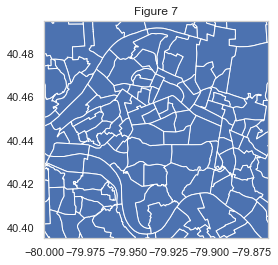

In [112]:
obesity = gpd.read_file("obesity/obesity_rates.shp")
obesity.plot()
plt.title('Figure 7') # title
plt.axis([-80, -79.865, 40.395, 40.495]) # focus on east end

**Figure 7.** Broken map of Pittsburgh.

Text(0.5, 1.0, 'Figure 8')

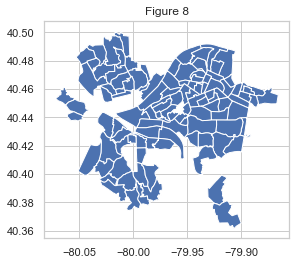

In [111]:
obesity = obesity[obesity["Municipa_1"] == 'Pittsburgh']
obesity.plot()
plt.title('Figure 8') # title

**Figure 8.** Another broken map of Pittsburgh.

The original plan was to compare food deserts to obesity rates per neighborhood. However, the data provided by Allegheny County did not work for the visualization I wanted to make, as seen in Figures 7 and 8. While the geodata is mostly there, there are a few neighborhoods missing, which would not illustrate the entirety of the narrative. In a future revision, an iteration could be made to include the obesity rates of neighborhoods compared to median income. Other graphs could further visualize the correlations (if any) between the two values.

As stated before, this data could potentially be harmful to the areas it highlights: developers could avoid working in these areas, and potential residents would avoid moving to them. Despite these possibilities, I believe this data could be used to help develop and improve the quality of life for the residents of food deserts in Pittsburgh.